In [1]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
from regression import process,compare_model,create_model,predict_model

In [2]:
df = pd.read_csv('data.csv')
df.drop(['Market Category'], inplace = True, axis = 1)
df.dropna(inplace = True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [3]:
y = df['MSRP']
X = df.drop(columns=['MSRP'])

X_train, X_test, y_train, y_test = process(X, y,
                                           test_size=0.1,
                                           normalize_method='robust',
                                          )

In [4]:
compare_model(X_train, y_train,fold=5)

,Model,MAE,MSE,RMSE,R2,TT (Sec)
lr,Linear Regression,4044.621195,2.635161e+08,14279.311706,0.924851,2.622836
dt,Decision Tree Regressor,3544.511904,2.555295e+08,14468.684812,0.926620,2.256503
gbr,Gradient Boosting Regressor,6515.389579,3.128718e+08,17040.687945,0.910054,5.204467
xgboost,Extreme Gradient Regressor,3883.147697,3.322757e+08,16508.012186,0.917038,5.006864
lightgbm,Light Gradient Boosting Machine,4885.340507,6.233394e+08,23056.170623,0.854223,0.779306


In [5]:
model = create_model(X_train, y_train,fold=10,md_name='dt')

,MAE,MSE,RMSE,R2
Fold,,,,
0,3071.107656,3.973937e+07,6303.916654,0.979999
1,4196.480077,1.429391e+09,37807.290855,0.655209
2,3011.738987,5.131314e+07,7163.318869,0.988055
3,3782.642569,4.033731e+08,20084.150139,0.951885
4,3159.421136,4.432712e+07,6657.861502,0.984170
5,2909.440684,3.159899e+07,5621.298231,0.984129
6,3586.457632,1.455054e+08,12062.563881,0.934875
7,2975.862711,3.253666e+07,5704.091311,0.987646
8,3259.539281,5.009713e+07,7077.932662,0.981472


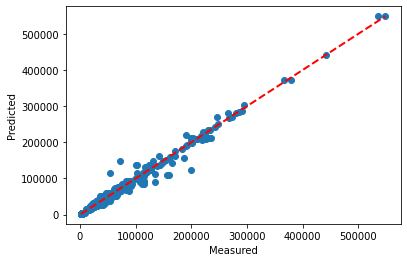

In [6]:
predict_model(X_test, y_test,model)